In [47]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
data = load_digits()

In [49]:
target = data.target
target_names = data.target_names
images = data.images

x = data.data
y = target

In [50]:
# data target target_names images
data.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [51]:
len(data.data[1])

64

9


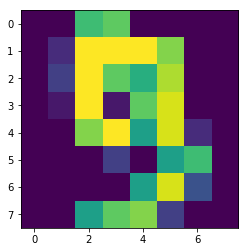

In [52]:
index = 9
plt.imshow(images[index])
print(target_names[index])

In [53]:
len(images)

1797

# 数据标准化

In [54]:
from sklearn.preprocessing import StandardScaler  

x = StandardScaler().fit_transform(x) 

# 分离训练集测试集

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# 获取KNN算法模型

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train) 
score = knn.score(x_test, y_test)
score

0.9722222222222222

In [57]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) 
score = knn.score(x_test, y_test)
score

0.9722222222222222

# 超参搜索

In [59]:
from sklearn.model_selection import GridSearchCV 

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [i for i in range(2, 6)], 'p':[1, 2, 3]}
grid_search = GridSearchCV(knn, param_grid=param_grid, cv = 2)
grid_search.fit(x_train, y_train)
print('best:', grid_search.best_estimator_)
print('best paramter', grid_search.best_params_)
knn = grid_search.best_estimator_
knn.fit(x_train, y_train) 
score = knn.score(x_test, y_test)

best: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='uniform')
best paramter {'n_neighbors': 5, 'p': 1}


In [61]:
score = knn.score(x_test, y_test)
score

0.9805555555555555